In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.shape

(200, 4)

<Axes: xlabel='newspaper', ylabel='sales'>

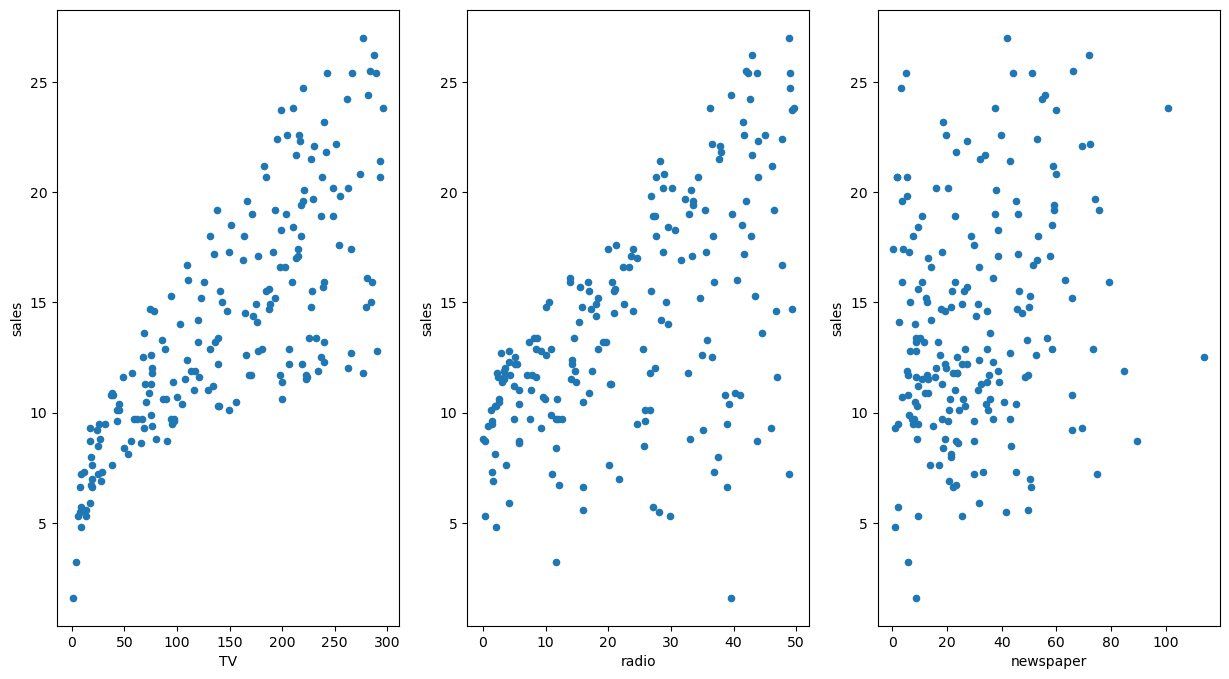

In [6]:
#Scatterplot

fig, axs = plt.subplots(1,3) #(row, column)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(15,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

<Axes: >

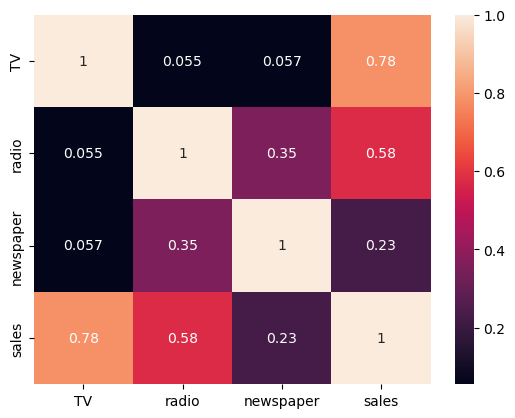

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.sales

In [9]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [27]:
x_train

,TV
190,39.5
7,120.2
26,142.9
138,43.0
58,210.8
...,...
113,209.6
64,131.1
15,195.4
125,87.2


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
my_first_model = LinearRegression()

In [30]:
my_first_model.fit(x_train, y_train)

LinearRegression()

In [31]:
my_first_model.coef_       #Return value of M(slope) or regression coeff    "y=mx+c"

array([0.04590358])

In [32]:
my_first_model.intercept_   #Return value of C   "y=mx+c"

7.169406404970454

In [33]:
.045*50+7.11

9.36

In [34]:
pred = my_first_model.predict(x_test)

In [35]:
pred

array([16.84129141,  7.56876758, 17.194749  , 20.18766263, 17.10294183,
       13.93100422, 15.8176415 , 16.29962912, 17.12130326,  7.95894804,
       20.46767449, 10.20363326,  7.94517696, 17.29114652, 17.70427877,
       11.88370441, 18.89318158,  7.41728575, 18.26430249, 16.57964098,
       15.79009935,  7.20153891, 19.16401272, 12.25093308, 20.03159044,
        8.03239377,  8.34453814,  9.21211586, 18.18167604,  8.06911664,
       13.21490833, 17.6354234 ,  8.43175495,  8.48224889, 20.51357807,
       19.8709279 , 10.85087379, 20.21979514, 11.28695783, 17.37836333])

In [21]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
Name: sales, dtype: float64

In [ ]:
#To calculate "error = actual - predicted"

1) MEA : Mean Absolute Error. Value to be lower

2) MSE : Mean square Error. Value to be lower

3) RMSE : Root Mean Square Error. Value to be lower
    
4) R^2 Squared. Value to be More

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluation of Train Data

In [37]:
my_linear_preds_train = my_first_model.predict(x_train)

print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train, y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train, y_train))
print('RMSE on Train Data :', np.sqrt(mean_absolute_error(my_linear_preds_train, y_train)))
print('R-squared on Train Data :', my_first_model.score(x_train, y_train))

MAE on Train Data : 2.4440175366174386
MSE on Train Data : 9.544179610554512
RMSE on Train Data : 1.5633353883979721
R-squared on Train Data : 0.5938543007414161


# Evaluation of Test Data

In [77]:
my_model_preds = my_first_model.predict(x_test)

print('MAE on Test Data :', mean_absolute_error(my_model_preds, y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds, y_test))
print('RMSE on Test Data :', np.sqrt(mean_absolute_error(my_model_preds, y_test)))
print('R-squared on Test Data :', my_first_model.score(x_test, y_test))

MAE on Test Data : 1.885013031042315
MSE on Test Data : 6.700486756528875
RMSE on Test Data : 1.3729577673921056
R-squared on Test Data : 0.8353672324670594


# Muliple Linear Regression

In [42]:
#Muliple Linear Regression : It is used when there is more than one independent or dependent variable.

feature_cols = ['TV', 'radio', 'newspaper']
x = data[feature_cols]
y = data.sales

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
my_first_model = LinearRegression()

In [70]:
my_first_model.fit(x_train, y_train)

LinearRegression()

In [71]:
my_first_model.coef_ 

array([ 0.0437726 ,  0.19343299, -0.00222879])

In [72]:
my_first_model.intercept_

3.2540971144188813

In [73]:
pred = my_first_model.predict(x_test)


In [74]:
pred

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [75]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: sales, dtype: float64

In [76]:
#Evaluation of Train Data

my_linear_preds_train = my_first_model.predict(x_train)

print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train, y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train, y_train))
print('RMSE on Train Data :', np.sqrt(mean_absolute_error(my_linear_preds_train, y_train)))
print('R-squared on Train Data :', my_first_model.score(x_train, y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492503
RMSE on Train Data : 1.032542252572392
R-squared on Train Data : 0.9209087553499528


In [78]:
#Evaluation of Test Data

my_model_preds = my_first_model.predict(x_test)

print('MAE on Test Data :', mean_absolute_error(my_model_preds, y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds, y_test))
print('RMSE on Test Data :', np.sqrt(mean_absolute_error(my_model_preds, y_test)))
print('R-squared on Test Data :', my_first_model.score(x_test, y_test))


MAE on Test Data : 1.885013031042315
MSE on Test Data : 6.700486756528875
RMSE on Test Data : 1.3729577673921056
R-squared on Test Data : 0.8353672324670594


# Polynomial Regression

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
data = pd.read_csv('Advertising.csv')

In [81]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [82]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [83]:
data.shape

(200, 4)

In [85]:
features = data[['TV', 'radio', 'newspaper']]  #x
target = data[['sales']].values  #y

# Convert features to PolynomialFeatures

In [87]:
features_poly = PolynomialFeatures(degree=2)

TV_poly = features_poly.fit_transform(features[['TV']])
radio_poly = features_poly.fit_transform(features[['radio']])
newspaper_poly = features_poly.fit_transform(features[['newspaper']])

In [88]:
poly_features = pd.concat([pd.DataFrame(TV_poly), pd.DataFrame(radio_poly), pd.DataFrame(newspaper_poly)], axis = 1)

In [89]:
poly_features

,0,1,2,0,1,2,0,1,2
0,1.0,230.1,52946.01,1.0,37.8,1428.84,1.0,69.2,4788.64
1,1.0,44.5,1980.25,1.0,39.3,1544.49,1.0,45.1,2034.01
2,1.0,17.2,295.84,1.0,45.9,2106.81,1.0,69.3,4802.49
3,1.0,151.5,22952.25,1.0,41.3,1705.69,1.0,58.5,3422.25
4,1.0,180.8,32688.64,1.0,10.8,116.64,1.0,58.4,3410.56
...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,1.0,3.7,13.69,1.0,13.8,190.44
196,1.0,94.2,8873.64,1.0,4.9,24.01,1.0,8.1,65.61
197,1.0,177.0,31329.00,1.0,9.3,86.49,1.0,6.4,40.96
198,1.0,283.6,80428.96,1.0,42.0,1764.00,1.0,66.2,4382.44


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, target, random_state=6)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 9)
(50, 9)
(150, 1)
(50, 1)


In [110]:
from sklearn.linear_model import LinearRegression

In [118]:
my_model = LinearRegression()

In [119]:
my_model.fit(x_train, y_train)

LinearRegression()

In [120]:
my_first_model.coef_ 

array([[ 0.00000000e+00,  7.76366570e-02, -1.12220872e-04,
         3.13117587e-16,  1.46025928e-01,  9.36830450e-04,
         0.00000000e+00,  2.13781336e-02, -2.07802344e-04]])

In [121]:
my_first_model.intercept_

array([1.41776908])

# Prediction Evaluation of Train Data

In [132]:
preds_train = my_model.predict(x_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, preds_train)))
print('R2 Score : ', my_model.score(x_train, y_train))

MAE :  1.2028934896198025
MSE :  2.488776665854577
RMSE: 1.5775857079266968
R2 Score :  0.9139135358655948


# Prediction Evaluation of Test Data

In [131]:
preds = my_model.predict(x_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
print('R2 score : ', my_model.score(x_test, y_test)) 

MAE :  0.9912741510675873
MSE :  1.5270219257567024
RMSE: 1.2357272861585207
R2 score :  0.9293009924314395
